# Smax runs: levlat plots with abs, diff for PI and PD separately

### div imports

In [5]:
import matplotlib.colors as colors
# load and autoreload
from IPython import get_ipython
from useful_scit.imps import (plt)

from sect_sens.constants import get_plotpath
from sect_sens.data_info.simulation_types import get_diff_by_type
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.plot.plot_levlat import plot_levlat_abs, get_cbar_label
from sect_sens.util.plot.plot_levlat import plot_levlat_diff
from sect_sens.util.practical_functions import make_folders
from IPython.display import clear_output
from sect_sens.util.plot.levlat_PIPD import abs_diffs_PI_PD_sep
from sect_sens.data_info.simulation_types import get_abs_by_type


from IPython.display import clear_output

from sect_sens.data_info.simulation_types import get_casen_by_type_mod

from sect_sens.util.slice_average.significance import load_and_plot_sign

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Div settings:

In [6]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0005-12'
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [7]:
cases_sec = [
    'NF1850_SECT_ctrl_smax',
    'NF1850_aeroxid2014_SECT_ctrl_smax'
]
cases_orig = [
    'NF1850_noSECT_def_smax',
    'NF1850_aeroxid2014_noSECT_def_smax',
]

cases = cases_orig + cases_sec

In [8]:
norm_dic = dict(
    SOA_LV=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    H2SO4=colors.SymLogNorm(vmin=-1e-1, vmax=1e-1, linthresh=.01, base=10),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10),
    N_AER=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10),
    N=colors.SymLogNorm(vmin=-2e2, vmax=2e2, linthresh=1, base=10),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=1, base=10),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1, base=10),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1, base=10)
)

## Plot function:

In [9]:
version = 'diffs-smax'
plot_path = get_plotpath('levlat')
filen_base = plot_path + '/_%s' % version
# print(plot_path)
make_folders(plot_path)

## Variables to load: 

In [10]:
varl = [
    'NCONC01', 'AWNC_incld', 'AREL_incld', 'HYGRO01', 'CLDLIQ',
    'NACT_FRAC01', 'NACT_FRAC04', 'NACT_FRAC06', 'NACT_FRAC08', 'NACT_FRAC14',
    'NACT01', 'NACT02', 'NACT04', 'NACT06', 'NACT08', 'NACT14', 'Smax_w', 'Smax'
]
# ,'N100','N250', 'FREQL', 'N50','N150','N200','N_AER']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'AWNC_incld', 'AREL_incld', 'HYGRO01', 'CLDLIQ', 'NACT_FRAC01', 'NACT_FRAC04', 'NACT_FRAC06', 'NACT_FRAC08', 'NACT_FRAC14', 'NACT01', 'NACT02', 'NACT04', 'NACT06', 'NACT08', 'NACT14', 'Smax_w', 'Smax']


## Load data:

In [11]:
case_dic = get_averaged_fields.get_levlat_cases(cases, varl, startyear, endyear,
                                                pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def_smax/NCONC01_0004-01-0005-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def_smax/AWNC_incld_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def_smax/AREL_incld_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def_smax/HYGRO01_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def_smax/CLDLIQ_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def_smax/NACT_FRAC01_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_def_smax/NACT_FRAC04_0004-01-0005-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/levlat_means//NorESM/NF1850_noSECT_d

## Calculate variables:

In [12]:
for case in cases:
    _ds = case_dic[case]
    # _ds['NPF_frac'] = _ds['NCONC01']/_ds['N_AER']*100
    # _ds['NPF_frac'].attrs['units']='%'
    _ds['NACT1_4'] = _ds['NACT01'] + _ds['NACT04']
    _ds['NACT1,4,6,8,14'] = _ds['NACT01'] + _ds['NACT04'] + _ds['NACT06'] + _ds['NACT08'] + _ds['NACT14']
    if _ds['Smax_w'].attrs['units'] != '%':
        _ds['Smax_w'] = _ds['Smax_w'] * 100.
        _ds['Smax_w'].attrs['units'] = '%'
# if 'NPF_frac' not in varl:
#    varl.append('NPF_frac')

In [13]:
varl.append('NACT1,4,6,8,14')

## Get PI to PD difference

In [14]:
relative = False
dic_diff = get_diff_by_type(case_dic, varl, ctrl='PI_smx', case_types=['PI_smx', 'PD_smx'],
                            mod_types=['OsloAeroSec', 'OsloAero$_{def}$'],
                            relative=relative)

['PI_smx', 'PD_smx'] ['OsloAeroSec', 'OsloAero$_{def}$']
subtracting NF1850_SECT_ctrl_smax-NF1850_SECT_ctrl_smax
subtracting NF1850_noSECT_def_smax-NF1850_noSECT_def_smax
subtracting NF1850_aeroxid2014_SECT_ctrl_smax-NF1850_SECT_ctrl_smax
subtracting NF1850_aeroxid2014_noSECT_def_smax-NF1850_noSECT_def_smax


### Organize data according to PI/PD and model version:

In [15]:

dic_abs = get_abs_by_type(case_dic,
                          case_types=['PI_smx', 'PD_smx'],
                          mod_types=['OsloAeroSec', 'OsloAero$_{def}$']
                          )

['PI_smx', 'PD_smx'] ['OsloAeroSec', 'OsloAero$_{def}$']


In [16]:
case_types = ['PI_smx', 'PD_smx']
mod_types = ['OsloAeroSec', 'OsloAero$_{def}$']
cases_oth = ['OsloAero$_{def}$']
ctrl = 'OsloAeroSec'

## Plots:

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxHYGRO01_PI_diff_PD_diff


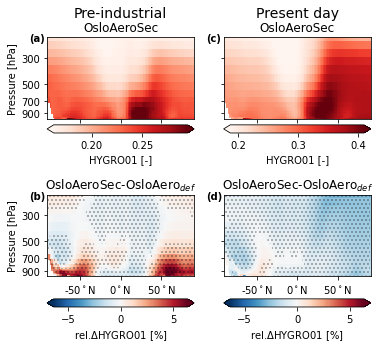

In [21]:
var = 'HYGRO01'
fg, axs_dict = abs_diffs_PI_PD_sep(
    dic_abs,
    var,
    case_types=case_types,
    ctrl=mod_types[0],
    cases_oth=mod_types[1:],
    sfg_size=2.9,
    asp_rat=.9,
    relative=True,
    type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
    # norm_diff=norm_dic[var],
    switch_diff=True
)
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

In [17]:

cases_oth = ['OsloAero$_{def}$']
ctrl = 'OsloAeroSec'

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNCONC01_PI_diff_PD_diff


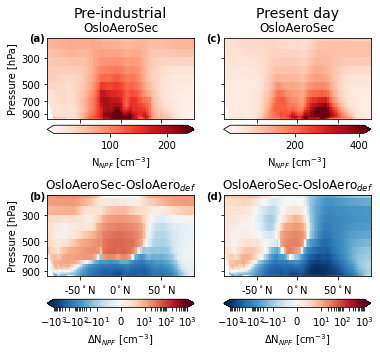

In [20]:
var = 'NCONC01'
fg, axs_dict = abs_diffs_PI_PD_sep(
    dic_abs,
    var,
    case_types=case_types,
    ctrl=mod_types[0],
    cases_oth=mod_types[1:],
    sfg_size=2.9,
    asp_rat=.9,
    relative=False,
    type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
    norm_diff=norm_dic[var],
    switch_diff=True
)

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
# plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxSmax_w_PI_diff_PD_diff


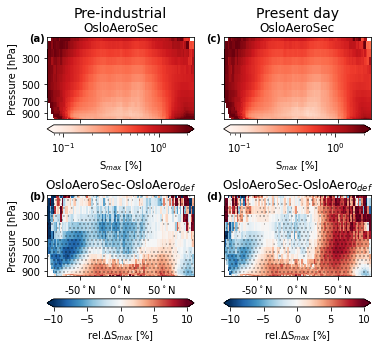

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxSmax_w_PI_diff_PD_diff


In [18]:
var = 'Smax_w'
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=True,
                                   norm_abs=colors.LogNorm(vmin=0.08, vmax=2),
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=colors.Normalize(vmin=-10, vmax=10),
                                   switch_diff=True
                                   )
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()
print(fn)

### fACT

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT_FRAC01_PI_diff_PD_diff


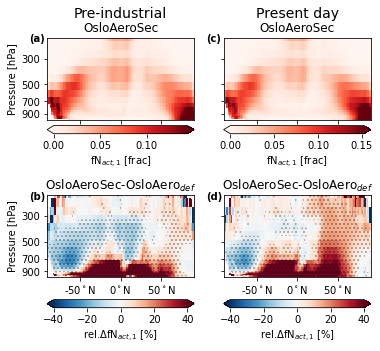

In [20]:
var = 'NACT_FRAC01'
norm = colors.Normalize(vmin=-40, vmax=40)
# norm =colors.SymLogNorm(vmin=-90,vmax=90, linthresh=.1, base=10, linscale=.5)

fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=True,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   switch_diff=True,
                                   norm_diff=norm
                                   )
# plt.tight_layout()
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT_FRAC04_PI_diff_PD_diff


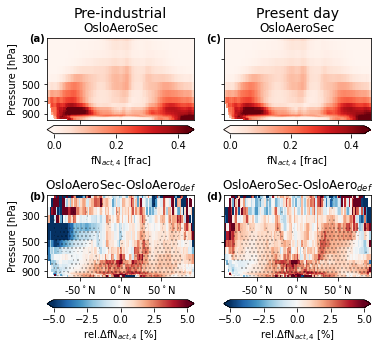

In [21]:
var = 'NACT_FRAC04'
norm = colors.Normalize(vmin=-5, vmax=5)
# norm =colors.SymLogNorm(vmin=-1,vmax=10, linthresh=.1, base=10, linscale=.5)

fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=True,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=norm,
                                   switch_diff=True
                                   )
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

### ACT

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT01_PI_diff_PD_diff


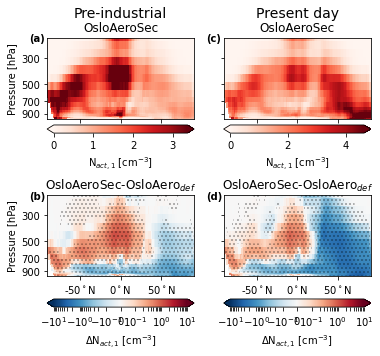

In [22]:
var = 'NACT01'
norm = colors.SymLogNorm(vmin=-10, vmax=10, linthresh=.1, base=10, linscale=.5)
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=norm,
                                   switch_diff=True
                                   )
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT04_PI_diff_PD_diff


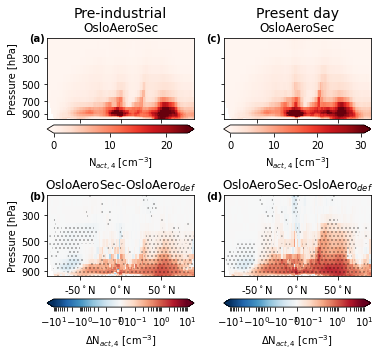

In [23]:
var = 'NACT04'
norm = colors.Normalize(vmin=-1.5, vmax=1.5)
norm = colors.SymLogNorm(vmin=-10, vmax=10, linthresh=.1, base=10, linscale=.5)

fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=norm,
                                   switch_diff=True
                                   )
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT06_PI_diff_PD_diff


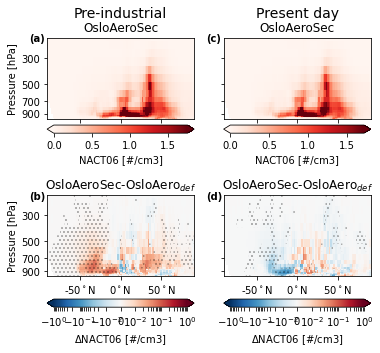

In [24]:
var = 'NACT06'
norm = colors.Normalize(vmin=-1.5, vmax=1.5)
norm = colors.SymLogNorm(vmin=-1, vmax=1, linthresh=.01, base=10, linscale=.5)

fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=norm,
                                   switch_diff=True
                                   )
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT08_PI_diff_PD_diff


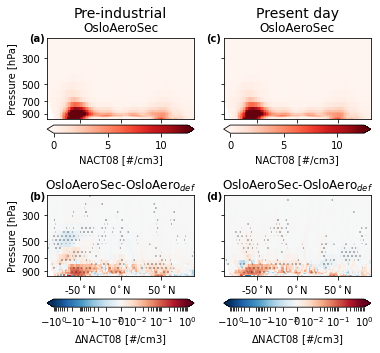

In [25]:
var = 'NACT08'
norm = colors.Normalize(vmin=-1.5, vmax=1.5)
norm = colors.SymLogNorm(vmin=-1, vmax=1, linthresh=.01, base=10, linscale=.5)

fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=norm,
                                   switch_diff=True
                                   )
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT14_PI_diff_PD_diff


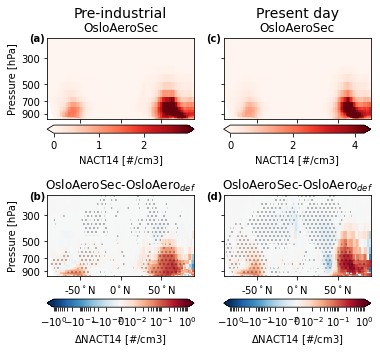

In [26]:
var = 'NACT14'
norm = colors.Normalize(vmin=-1.5, vmax=1.5)
norm = colors.SymLogNorm(vmin=-1, vmax=1, linthresh=.01, base=10, linscale=.5)

fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=norm,
                                   switch_diff=True
                                   )
for ct in ['PI_smx', 'PD_smx']:
    ax_di = axs_dict[ct]
    for case_oth in cases_oth:
        ax = ax_di[case_oth]
        cs_to = get_casen_by_type_mod(ct, ctrl)
        cs_from = get_casen_by_type_mod(ct, case_oth)

        load_and_plot_sign(cs_to, [cs_from], [ax], var, startyear, endyear, pressure_adjust=pressure_adjust,
                           avg_over_lev=avg_over_lev,

                           ci=.95,
                           groupby=None,
                           dims=('lon',),
                           area='Global',
                           avg_dim='time',
                           hatches=['...', ''], hatch_lw=.3,
                           transform=None,
                           reverse=False)
clear_output()

# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
plt.savefig(fn + '.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxNACT1,4,6,8,14_PI_diff_PD_diff


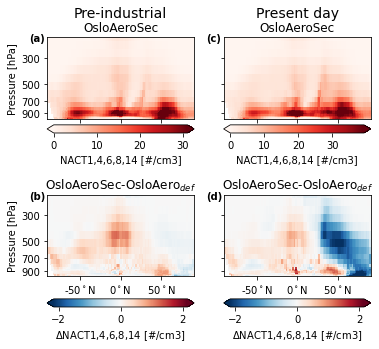

In [28]:
var = 'NACT1,4,6,8,14'
norm = colors.Normalize(vmin=-1, vmax=1)
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   # norm_diff=norm_dic[var],
                                   switch_diff=True

                                   )
# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
# plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/levlat//_diffs-smaxAWNC_incld_PI_diff_PD_diff


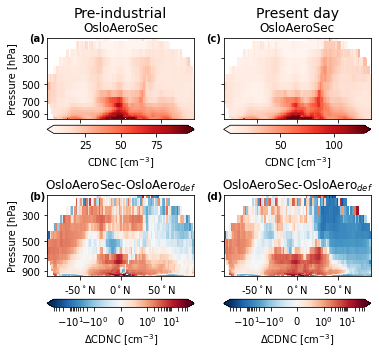

In [29]:
var = 'AWNC_incld'
norm = colors.Normalize(vmin=-1, vmax=1)
fg, axs_dict = abs_diffs_PI_PD_sep(dic_abs,
                                   var,
                                   case_types=case_types,
                                   ctrl=mod_types[0],
                                   cases_oth=mod_types[1:],
                                   sfg_size=2.9,
                                   asp_rat=.9,
                                   relative=False,
                                   type_nndic=dict(PI_smx='Pre-industrial', PD_smx='Present day'),
                                   norm_diff=norm_dic[var],
                                   switch_diff=True

                                   )
# plt.tight_layout()
fn = filen_base + f'{var}_PI_diff_PD_diff'
# plt.savefig(fn+'.pdf', dpi=300)
print(fn)
plt.show()